In [1]:
import pandas as pd

In [2]:
lawinen_set = pd.read_csv('newData/gesamt_set_1990.csv', sep=',')

In [3]:
lawinen_set['ID'] = lawinen_set['ID'].fillna(0)
lawinen_set

,Datum,Intervall,Lawinengrad,Schneehöhe,Schneehöhe_Norm,Niederschlag,Lufttemperatur_7h,Lufttemperatur_7h_Norm,Lufttemperatur_7h_Gew,Lufttemperatur_14h,...,Lawinen_Art,Volumen,ID,meanExpo,meanSlope,stdDevSlope,MinSlope,MaxSlope,Altitude,Avalanche
0,1990-01-02 00:00:00,1989/ 1990,0.0,22.0,27.392996,0.0,-8.4,-67.2,-20.8,-4.6,...,NaN,NaN,0.0,240.622592,40.215386,6.827700,3.598443,60.656714,2925.378871,0
1,1990-01-03 00:00:00,1989/ 1990,0.0,22.0,26.546003,0.0,-7.4,-59.2,-33.6,-5.1,...,NaN,NaN,0.0,82.521374,39.486485,8.214154,14.862285,71.692138,1822.645769,0
2,1990-01-04 00:00:00,1989/ 1990,0.0,22.0,25.901398,0.0,-3.0,-24.0,-29.6,-1.4,...,NaN,NaN,0.0,90.017684,42.532060,7.096070,13.290100,65.780740,2749.763940,0
3,1990-01-05 00:00:00,1989/ 1990,0.0,19.0,22.711991,0.4,-6.6,-52.8,-12.0,-5.3,...,NaN,NaN,0.0,279.738227,39.635600,8.306790,5.107610,63.339610,3027.450950,0
4,1990-01-06 00:00:00,1989/ 1990,0.0,19.0,23.030303,0.0,-8.6,-68.8,-26.4,-4.5,...,NaN,NaN,0.0,68.013048,34.367700,3.891300,19.264000,41.614200,1879.884500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lockerschnee- und Schneebrettlawinen trocken,mittel,32.0,291.038533,44.495709,5.800336,15.979145,61.018300,2256.943155,1
7038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Schneebrettlawine naß,mittel,11.0,83.428097,39.152621,7.412260,7.983723,62.527311,2637.086851,1
7039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lockerschneelawine naß,gross,2.0,264.471932,43.070671,8.680311,9.192779,69.469879,2887.147429,1
7040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Schneebrettlawine naß,mittel,8.0,260.468688,42.659900,7.696246,7.606200,65.809534,3022.772909,1


<AxesSubplot:>

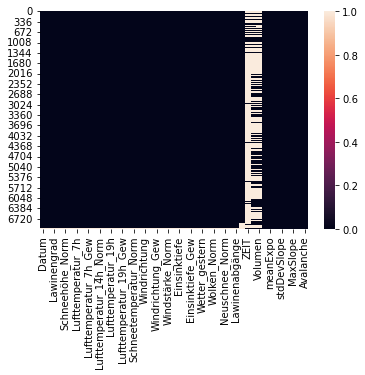

In [4]:
import seaborn as sns

sns.heatmap(lawinen_set.isna())

In [5]:
from sklearn import tree

lawinen_set = lawinen_set.drop(['Datum', 'Intervall', 'ZEIT', ], axis=1)

lawinen_set['Lawinen_Art'] = pd.factorize(lawinen_set['Lawinen_Art'])[0]
lawinen_set['Volumen'] = pd.factorize(lawinen_set['Volumen'])[0]
lawinen_set['Distanz'] = lawinen_set['Distanz'].fillna(0)
lawinen_set.dropna(inplace=True)
lawinen_set

,Lawinengrad,Schneehöhe,Schneehöhe_Norm,Niederschlag,Lufttemperatur_7h,Lufttemperatur_7h_Norm,Lufttemperatur_7h_Gew,Lufttemperatur_14h,Lufttemperatur_14h_Norm,Lufttemperatur_14h_Gew,...,Lawinen_Art,Volumen,ID,meanExpo,meanSlope,stdDevSlope,MinSlope,MaxSlope,Altitude,Avalanche
0,0.0,22.0,27.392996,0.0,-8.4,-67.2,-20.8,-4.6,-36.8,-10.0,...,-1,-1,0.0,240.622592,40.215386,6.827700,3.598443,60.656714,2925.378871,0
1,0.0,22.0,26.546003,0.0,-7.4,-59.2,-33.6,-5.1,-40.8,-18.4,...,-1,-1,0.0,82.521374,39.486485,8.214154,14.862285,71.692138,1822.645769,0
2,0.0,22.0,25.901398,0.0,-3.0,-24.0,-29.6,-1.4,-11.2,-20.4,...,-1,-1,0.0,90.017684,42.532060,7.096070,13.290100,65.780740,2749.763940,0
3,0.0,19.0,22.711991,0.4,-6.6,-52.8,-12.0,-5.3,-42.4,-5.6,...,-1,-1,0.0,279.738227,39.635600,8.306790,5.107610,63.339610,3027.450950,0
4,0.0,19.0,23.030303,0.0,-8.6,-68.8,-26.4,-4.5,-36.0,-21.2,...,-1,-1,0.0,68.013048,34.367700,3.891300,19.264000,41.614200,1879.884500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,33.0,175.0,162.359178,16.0,-9.0,-72.0,-36.0,-1.0,-8.0,-40.0,...,1,1,33.0,62.004911,41.474100,8.876500,1.418093,65.950220,2223.063053,1
7004,33.0,155.0,141.483293,8.0,4.0,32.0,-36.0,8.0,64.0,-4.0,...,-1,-1,0.0,291.294103,42.673879,7.093168,13.117353,57.314842,2206.059189,0
7005,33.0,149.0,134.537246,0.0,-1.0,-8.0,16.0,1.0,8.0,32.0,...,-1,-1,0.0,74.588712,40.891475,7.230925,0.000000,61.394750,2286.169850,0
7006,22.0,144.0,129.792371,0.0,-2.0,-16.0,-4.0,-6.0,-48.0,4.0,...,-1,-1,0.0,271.664767,41.924600,4.659500,33.076000,54.920900,1980.761100,0


<AxesSubplot:>

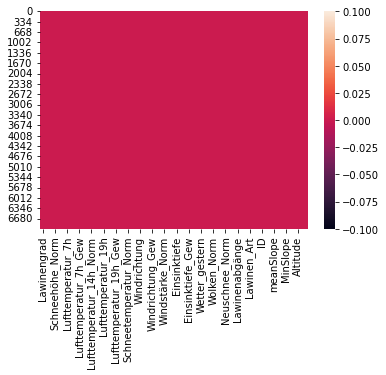

In [6]:
sns.heatmap(lawinen_set.isna())

In [7]:
#sns.pairplot(lawinen_set, hue="Avalanche",palette="bright")

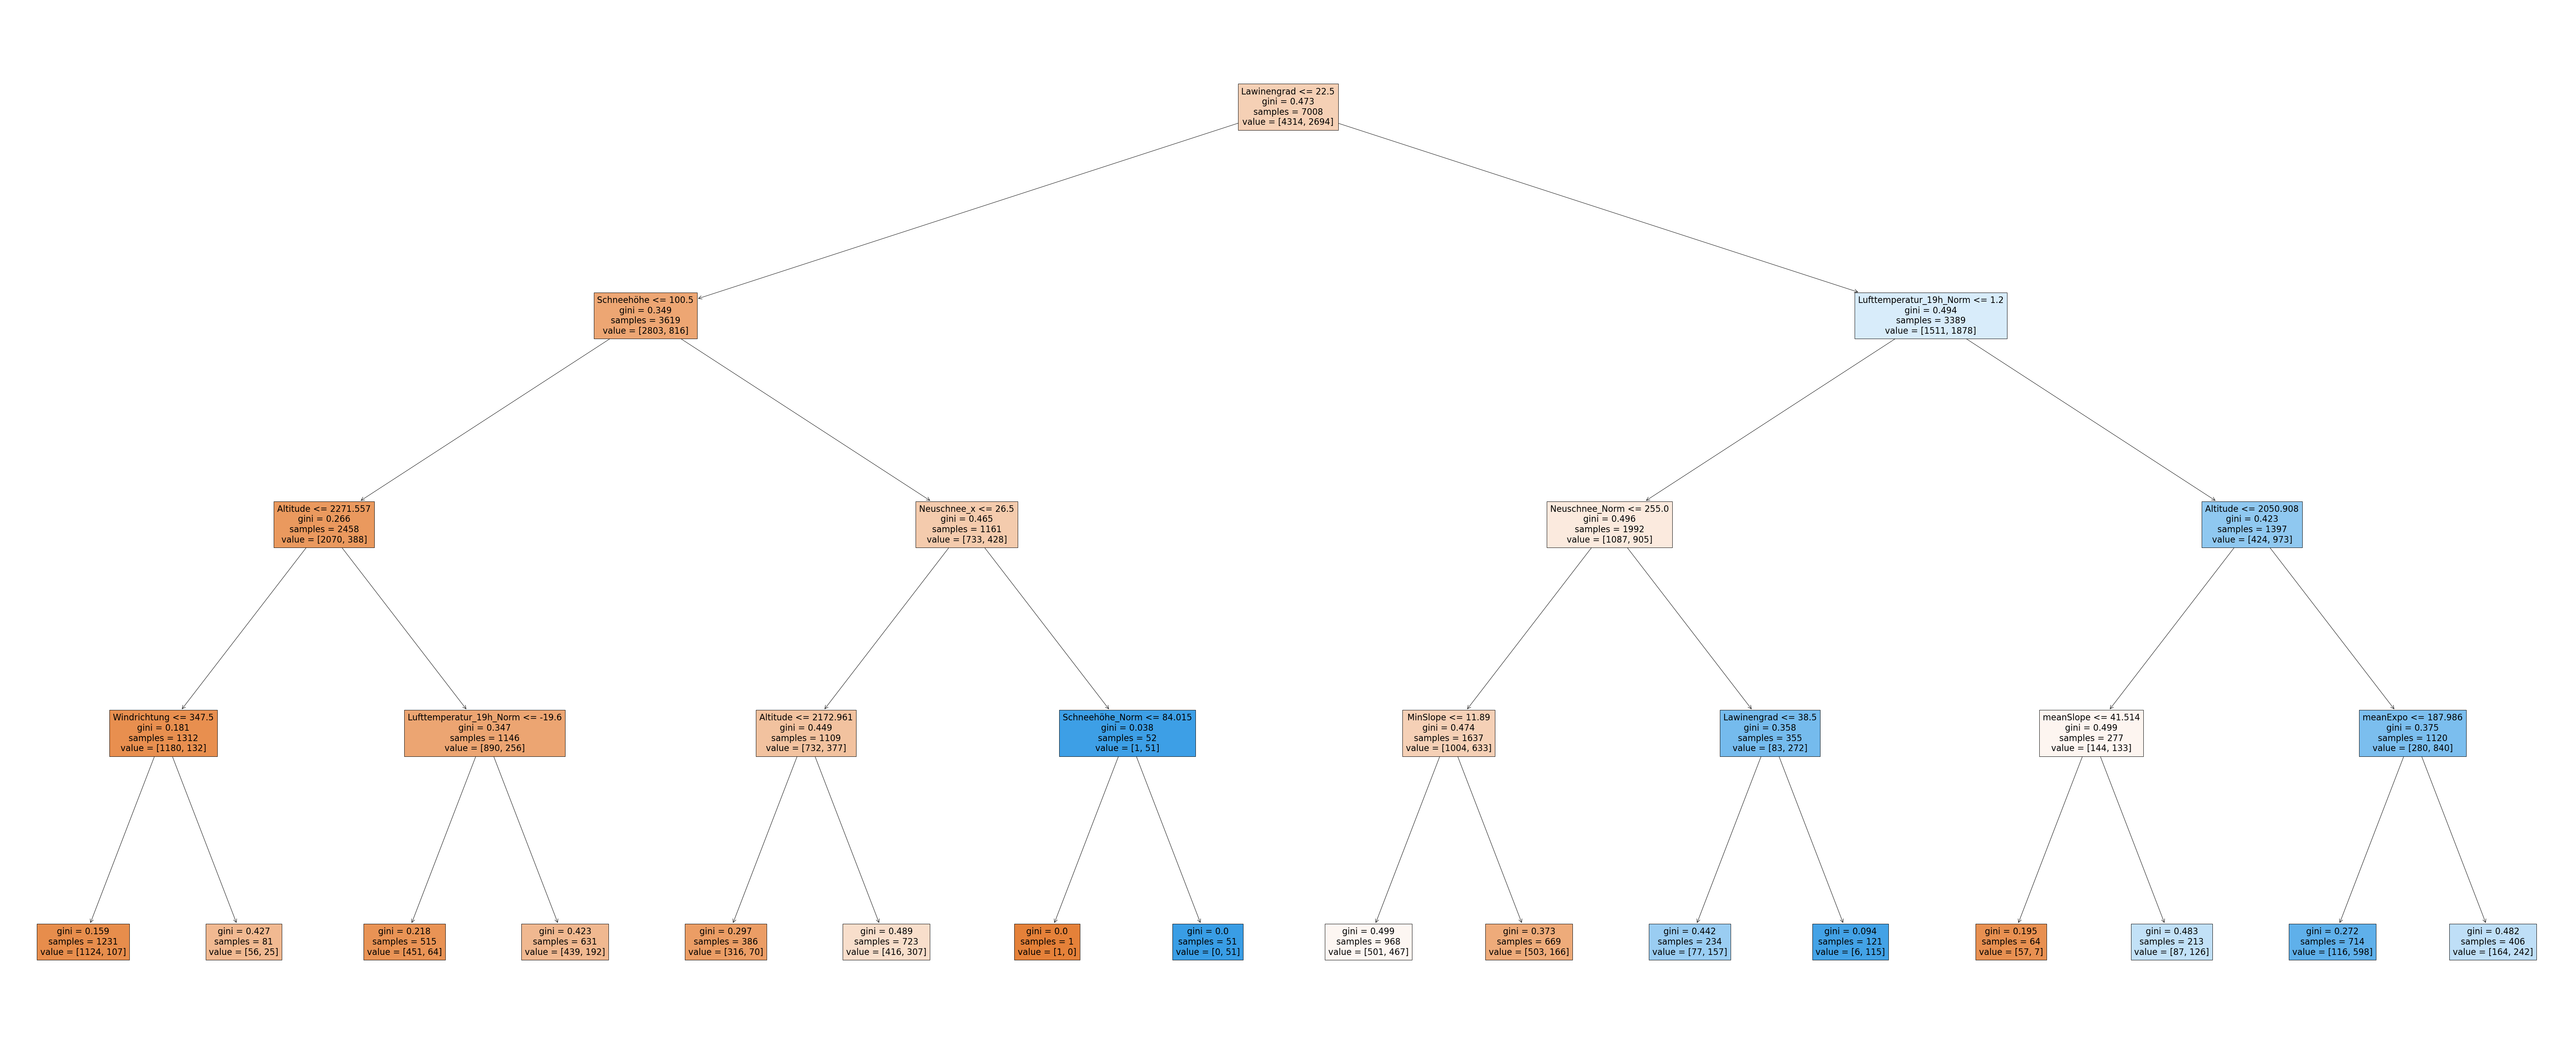

In [8]:
import copy
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

avalanche_set = copy.copy(lawinen_set)

avalanche_set = avalanche_set.drop([ 'Lawinenabgänge', 'ID', 'Volumen', 'Lawinen_Art',], axis=1)
feature_names = avalanche_set.columns.drop('Avalanche')
X = avalanche_set[avalanche_set.columns.drop('Avalanche')]
y = avalanche_set['Avalanche']
dt = tree.DecisionTreeClassifier( max_depth=4)
dt.fit(X, y)


fig, ax = plt.subplots(figsize=(120, 50))
tree.plot_tree(dt, filled=True, ax=ax, feature_names=feature_names)
plt.show()

In [9]:
cross_val_score(dt, X, y, cv=5)

array([0.65335235, 0.75820257, 0.70399429, 0.69450393, 0.68236974])

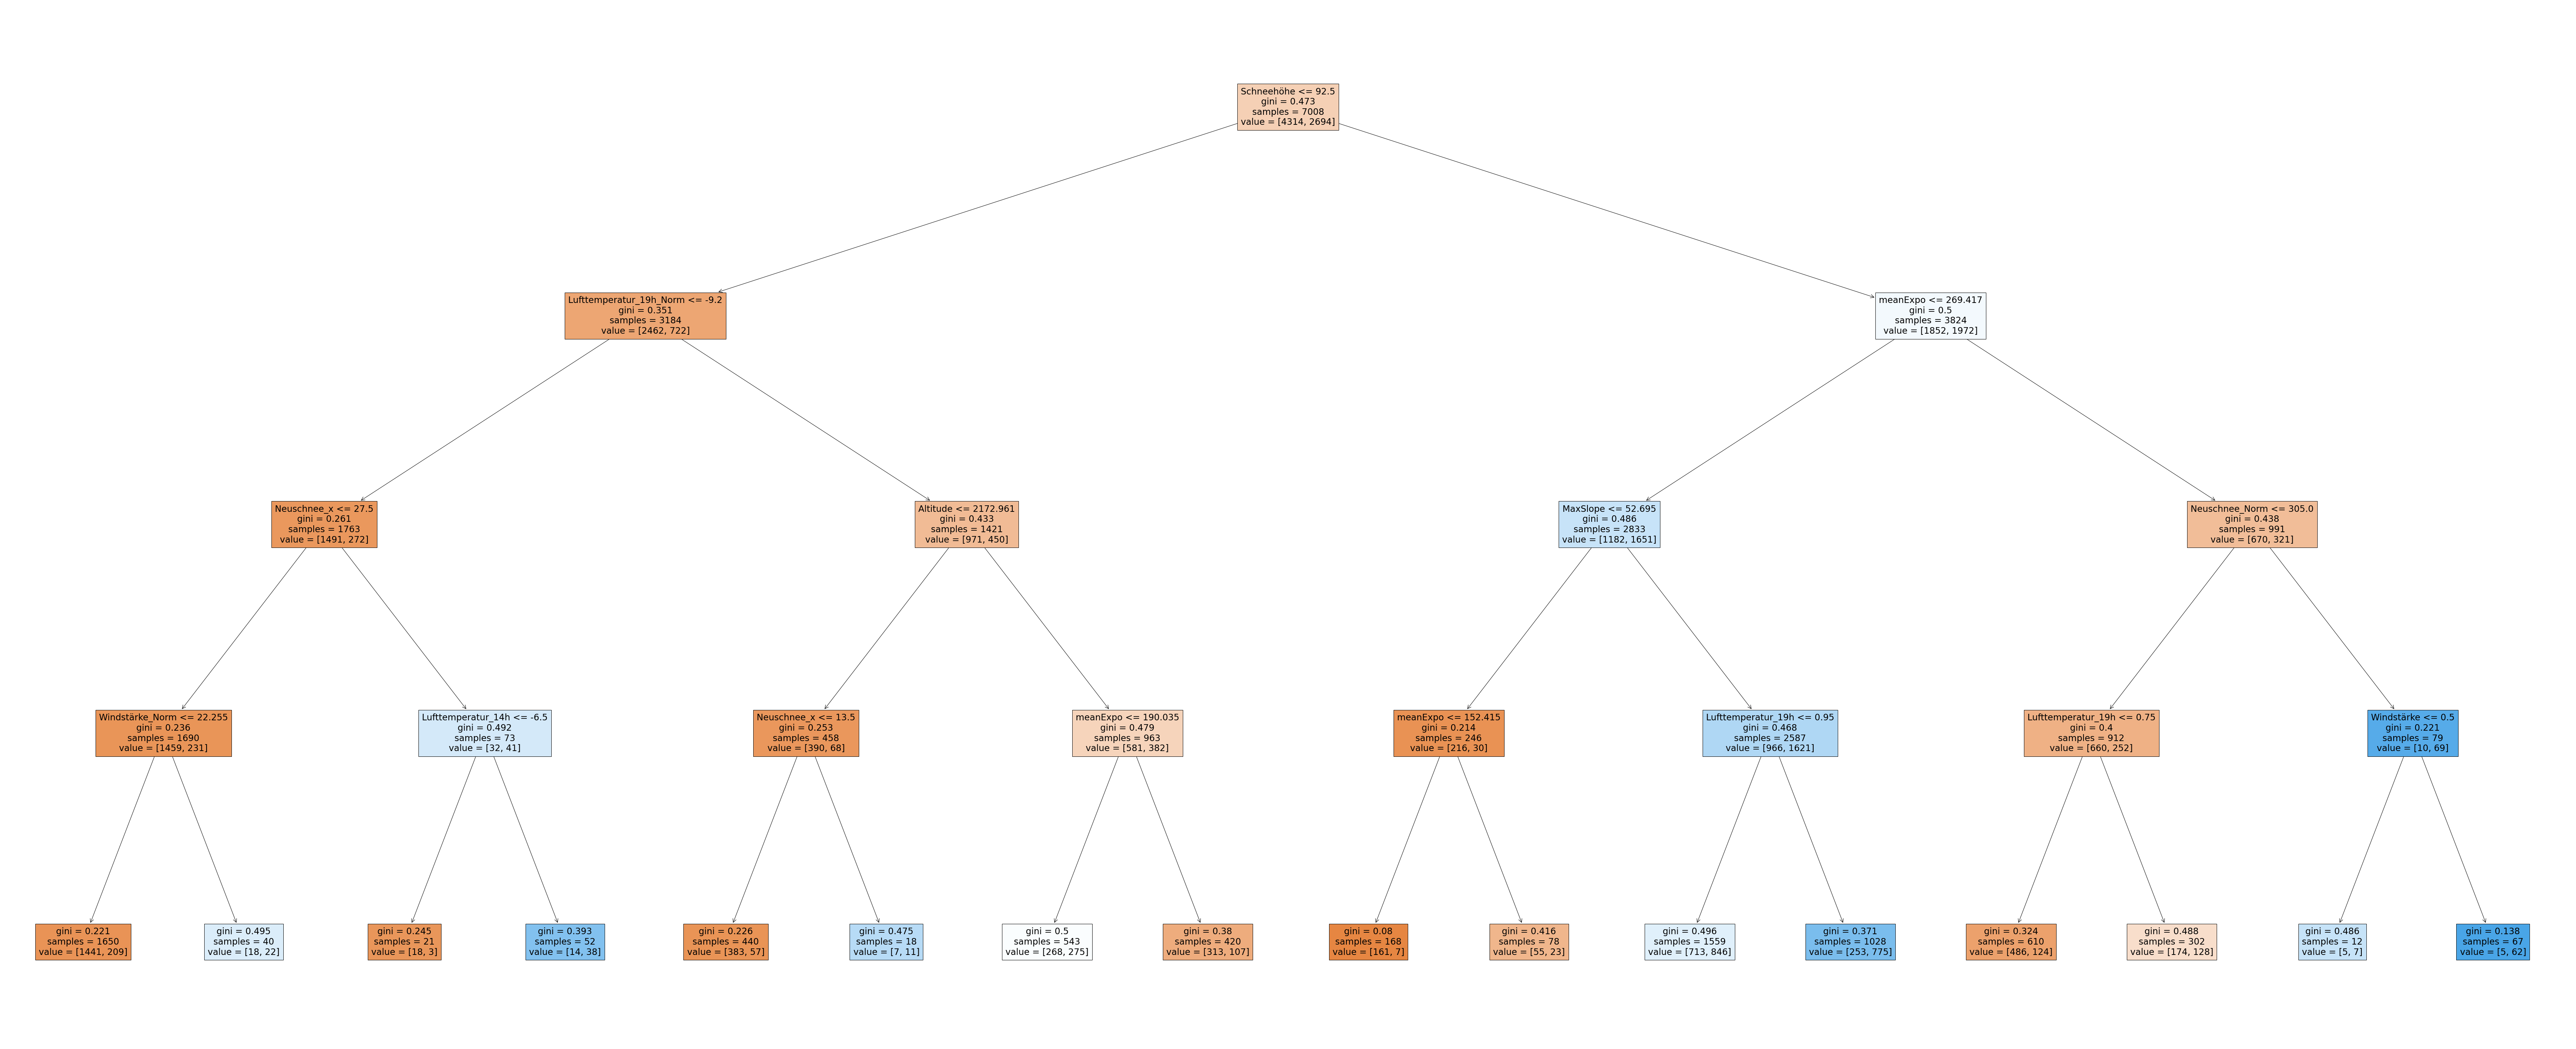

In [10]:
avalanche_set_noLawinengrad = avalanche_set.drop(['Lawinengrad',], axis=1)
feature_names = avalanche_set_noLawinengrad.columns.drop('Avalanche')
X_noLawinengrad = avalanche_set_noLawinengrad[avalanche_set_noLawinengrad.columns.drop('Avalanche')]
y_noLawinengrad = avalanche_set_noLawinengrad['Avalanche']
dt = tree.DecisionTreeClassifier( max_depth=4)
dt.fit(X_noLawinengrad, y_noLawinengrad)


fig, ax = plt.subplots(figsize=(120, 50))
tree.plot_tree(dt, filled=True, ax=ax, feature_names=feature_names)
plt.show()

In [11]:
cross_val_score(dt, X_noLawinengrad, y_noLawinengrad, cv=5)

array([0.67403709, 0.68758916, 0.64479315, 0.69307637, 0.68736617])

In [12]:
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_train , X_test , y_train, y_test = train_test_split(X, y, random_state=0)

clf = make_pipeline(StandardScaler(), svm.SVC())
#clf = svm.SVC()
clf.fit(X_train,y_train)

#gram_test = np.dot(X_test, X_train.T)
pred = clf.predict(X_test)

print(accuracy_score(y_test, pred), cross_val_score(clf, X, y, cv=5))

0.7842465753424658 [0.72253923 0.77175464 0.70542083 0.74375446 0.73804425]


In [13]:

X_train , X_test , y_train, y_test = train_test_split(X_noLawinengrad, y_noLawinengrad, random_state=0)

clf = make_pipeline(StandardScaler(), svm.SVC())
#clf = svm.SVC()
clf.fit(X_train,y_train)

#gram_test = np.dot(X_test, X_train.T)
pred = clf.predict(X_test)

print(accuracy_score(y_test, pred), cross_val_score(clf, X, y, cv=5))

0.769406392694064 [0.72253923 0.77175464 0.70542083 0.74375446 0.73804425]
